# Практические работы №3-4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

**Часть базы данных спектрометров низкого разрешения IRAS 2.**

In [2]:
dataset = pd.read_csv("https://datahub.io/machine-learning/spectrometer/r/spectrometer.csv")
dataset

,LRS-name,LRS-class,ID-type,Right-Ascension,Declination,Scale_Factor,Blue_base_1,Blue_base_2,Red_base_1,Red_base_2,...,red-band-flux_40,red-band-flux_41,red-band-flux_42,red-band-flux_43,red-band-flux_44,red-band-flux_45,red-band-flux_46,red-band-flux_47,red-band-flux_48,red-band-flux_49
0,12043-6225,28,2,12.073,-62.428,1.250000e-16,2498,2630,1740,1783,...,1669.91490,2039.33590,1891.61340,1040.11570,1211.53580,1767.62330,1146.94710,1392.47450,1278.99450,1440.48200
1,12063-6259,85,3,12.106,-62.987,2.970000e-16,1086,1241,421,674,...,6879.97070,7056.40530,6817.42970,6682.79440,6988.59770,7084.03600,6971.78300,7015.57470,6962.22000,6263.44000
2,12073-6233,95,3,12.123,-62.554,3.130000e-15,481,270,63,451,...,7048.21630,6998.41550,6669.61100,6551.05900,6679.77150,6564.26300,6309.63960,5954.38800,5337.88870,4638.52440
3,12148-6741,18,4,12.247,-67.683,1.730000e-15,191,232,103,103,...,523.37290,507.43262,446.32816,417.10430,454.29834,448.98490,459.61176,409.13416,366.62670,332.08942
4,12216-6218,42,0,12.360,-62.303,2.180000e-16,1401,1268,1042,1063,...,1083.34880,664.50507,909.68350,837.53380,862.60760,693.25110,890.75964,473.78302,658.46140,725.74945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,23491+6243,43,2,23.819,62.732,2.220000e-16,1315,1495,843,810,...,931.53430,883.77320,998.42004,735.88940,1088.73080,687.22630,686.34280,934.49110,933.59190,501.37790
527,23496+6131,27,4,23.827,61.526,1.250000e-15,238,280,99,142,...,1463.34830,1423.84380,1320.31090,1279.61380,1284.83720,1236.90540,1208.31240,1203.89100,1099.19290,1037.99740
528,23528+4821,22,4,23.881,48.360,5.740000e-16,577,568,416,431,...,1099.62080,1025.80850,795.37830,767.25446,802.76160,843.16656,642.11680,824.46655,703.36536,649.15760
529,23541+7031,31,3,23.902,70.526,4.120000e-16,995,1177,463,398,...,1981.20740,1970.82130,1748.14440,1757.16270,1724.30970,1721.34130,1546.44600,1677.99240,1601.73520,1470.15520


In [3]:
print('Количество уникальных классов =', dataset['LRS-class'].nunique())

Количество уникальных классов = 48


**Визуальная оценка распределения данных по классам**

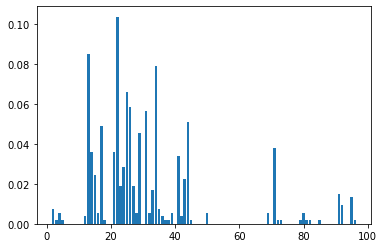

In [4]:
distribution = dataset.groupby('LRS-class').size() / len(dataset)
plt.bar(dataset['LRS-class'].unique(), list(distribution))
plt.show()

In [5]:
count_examples_class = dataset.groupby('LRS-class').size().sort_values(ascending=False)
count_examples_class

LRS-class
29    55
42    45
28    42
27    35
23    31
26    30
22    27
18    26
15    24
43    20
24    19
25    19
44    18
21    15
16    13
17    12
32    10
14    10
31     9
41     8
4      7
45     5
33     4
34     4
13     3
2      3
79     3
38     3
39     3
91     3
35     3
80     3
69     2
12     2
81     2
82     1
3      1
92     1
5      1
85     1
95     1
73     1
72     1
71     1
50     1
37     1
36     1
96     1
dtype: int64

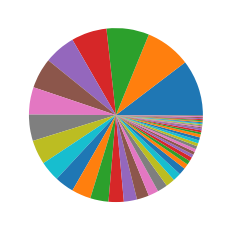

In [6]:
plt.pie(count_examples_class)
plt.show()

**Возникает проблема: мы не сможем предсказать класс, у которого очень мало примеров в исходных данных. Поэтому малочисленные классы придётся отбросить.**

In [7]:
count_examples_class = count_examples_class[count_examples_class > 10]
classes = list(dict(count_examples_class).keys())
droplist = []
for index, row in dataset.iterrows():
    if row['LRS-class'] not in classes:
        droplist.append(index)
dataset = dataset.drop(droplist)

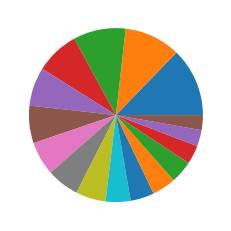

In [8]:
count_examples_class = dataset.groupby('LRS-class').size().sort_values(ascending=False)
plt.pie(count_examples_class)
plt.show()

In [9]:
print('Количество уникальных классов после фильтрации =', count_examples_class.count())

Количество уникальных классов после фильтрации = 16


In [10]:
X = dataset.drop(['LRS-class', 'LRS-name'], axis=1)
y = dataset['LRS-class']

**Разбиение обучающей выборки на тестовую и тренировочную**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

**Шкалирование данных**

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Обучение модели алгоритма опорных векторов**

In [13]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
clf.score(X_test, y_test)

0.5086705202312138

**Поиск оптимальных параметров опорных векторов с помощью кроссвалидации.**

In [15]:
svc = svm.SVC()
param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [i * 0.1 for i in range(1, 16)]}
gscv =  GridSearchCV(svc, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0, 1.1, 1.2000000000000002, 1.3,
                               1.4000000000000001, 1.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

**Модель с лучшими парметрами**

In [16]:
gscv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [17]:
best_c = gscv.best_estimator_

In [18]:
y_pred = best_c.predict(X_test)

In [20]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
Accuracy: 0.6589595375722543


**Итоговая точность метода опорных векторов: 65,89%**

**Обучение KNN-классификатора**

In [21]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.5202312138728323

In [22]:
svc = KNeighborsClassifier()
param = {'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'n_neighbors': range(2, 10)}
gscv2 =  GridSearchCV(svc, param, cv=3, n_jobs=-1, verbose=1)
gscv2.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [23]:
gscv2.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [25]:
best_c2 = gscv2.best_estimator_
y_pred2 = best_c2.predict(X_test)
result3 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(result3)
result4 = accuracy_score(y_test,y_pred2)
print("Accuracy:",result4)

Confusion Matrix:
[[10  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  5  2  2  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  3  2  1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  2  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  0  1  4  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  6  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  5  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  5  3  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  2 15  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  4  6]]
Accuracy: 0.5549132947976878


**На этих данных лучше всего себя показал метод опорных векторов. Лучшая точность предсказаня 65%. Это неплохой резульатат для предсказания 16 классов и обучения на сравнительно небольшой обучающей выборке.**